In [1]:
from module_imports import *
from download_data import *
from import_data import *

%matplotlib inline

stock_df, prediction_df = pd.DataFrame(), pd.DataFrame()
pred_tickers = []
source = "Q"
binarize = True
gt = 0
lt = 10.0
vol = 0
if source == "Q":
    stock_df, prediction_df, pred_tickers = get_quandl_data(binarize=True, gt=gt, lt=lt, vol=vol)
elif source == "G":
    stock_df, prediction_df = get_goog_data(binarize=True, gt=gt, lt=lt, vol=vol)
    
Y = stock_df['label'].values
Y = Y.reshape(Y.shape[0], 1)

X_df = stock_df.drop('label', axis=1)
X = X_df.values

print X.shape, Y.shape
X_df.tail()

(170928, 10) (170928, 1)


,Open,High,Low,Close,Volume,50dravg,200dravg,OC%,HL%,ticker
822,7.06,7.60,7.03,7.33,175100,8.5522,7.04460,0.038244,0.081081,78
823,7.29,7.60,6.87,6.91,138100,8.5224,7.04130,-0.052126,0.106259,78
824,6.86,6.96,6.56,6.66,121400,8.4868,7.03935,-0.029155,0.060976,78
825,6.68,6.94,6.46,6.56,166700,8.4550,7.03830,-0.017964,0.074303,78
826,6.26,6.31,5.63,6.20,229200,8.4026,7.03650,-0.009585,0.120782,78


In [2]:
# randomly balance labeled data
indices_Y_is_0 = np.where(Y == 0)[0]
print indices_Y_is_0.shape[0]
indices_Y_is_1 = np.where(Y == 1)[0]
print indices_Y_is_1.shape[0]

subset_indices_Y_is_0 = np.random.choice(indices_Y_is_0, indices_Y_is_1.shape[0])
X_is_0 = X[subset_indices_Y_is_0]
Y_is_0 = Y[subset_indices_Y_is_0]
X_is_1 = X[indices_Y_is_1]
Y_is_1 = Y[indices_Y_is_1]

X = np.concatenate((X_is_0,X_is_1))
Y = np.concatenate((Y_is_0,Y_is_1))

153257
17671


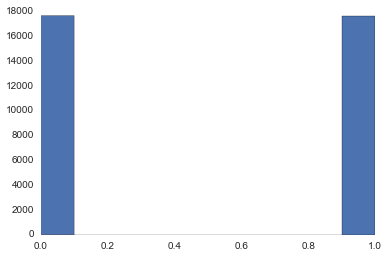

In [3]:
plt.hist(Y)
plt.show()

In [4]:
vectorize_label = True
if vectorize_label == True:
    new_y = []
    positives = []
    for i in xrange(Y.shape[0]):
        if Y[i] == 0:
            new_y.append(np.array([[1],[0]]))
        elif Y[i] == 1:
            new_y.append(np.array([[0],[1]]))
    Y = new_y

In [5]:
X_train, X_vt, y_train, y_vt = train_test_split(X, Y, test_size=0.30, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_vt, y_vt, test_size=0.50, random_state=42)

In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [7]:
#for x,y in zip(X_train, y_train):
#    print x.reshape(x.shape[0],1)
#    print y.reshape(y.shape[0],1)
#    break

---

In [ ]:
#Q,True,0,50.0,0,10,2
#h1: 2 h2: 2 epochs: 20 Lambda: 1.0 Reg: L2 alpha: 1.0   <--- alpha was the culprit
# np.isnan(W1[0])[0] == True) == True
# EPOCH 0

In [ ]:
hs = [1, 2, 5, 10, 15, 50, 100]

epochs = 20 
Lambdas = [0.0001, 0.001, 0.01, 0.1, 1.0]
Regs = ['L2', 'L1']
alphas = [0.0001, 0.001, 0.01, 0.1]

# GRID SEARCH
for h in hs:
    for Lambda in Lambdas:
        for Reg in Regs:
            for alpha in alphas:
                NN_SGD(X_train, y_train, X_validation, y_validation, h, h, epochs, Lambda, Reg, alpha, plot=False)

---